In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_selection import SelectKBest 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import manifold

In [2]:
df= pd.read_csv('student-mat.csv')

In [3]:
df.head()
df_copy=df.copy()

In [4]:
df_copy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'Dalc'}>,
        <AxesSubplot:title={'center':'Walc'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>,
        <AxesSubplot:title={'center':'G3'}>]], dtype=object)

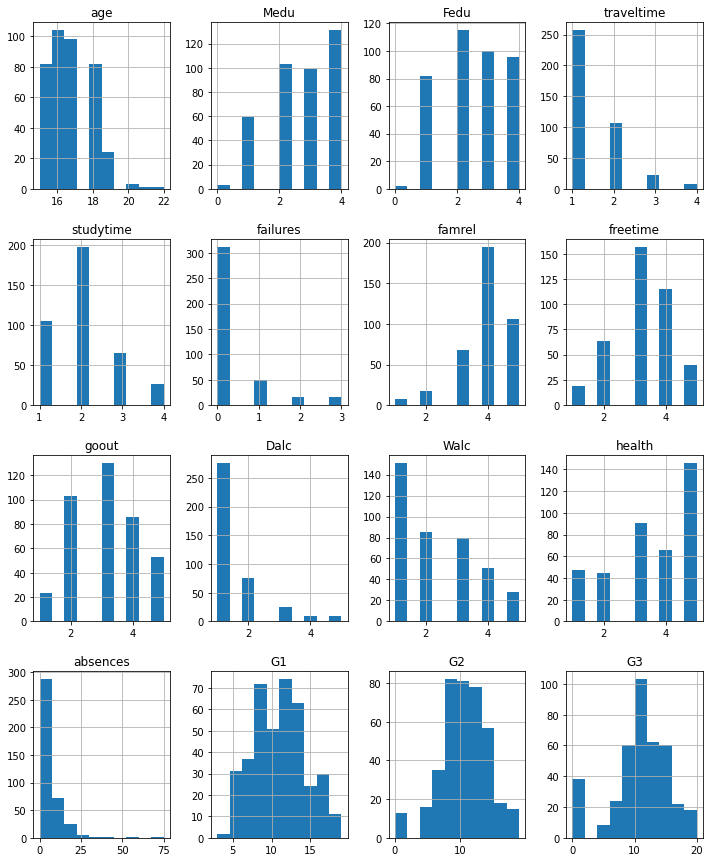

In [7]:
%matplotlib inline
df_copy.hist(bins=10, figsize=(12,15))

In [8]:
#numerical feature
num=['failures','age', 'G1', 'G2', 'G3', 'absences']

# ordinal feature
cat_ord=[]
for cols in df.columns:
    if cols not in num and df[cols].dtype =='int64':
        cat_ord.append(cols)

# binary feature
cat_binary=[]
for cols in df.columns:
    if len(df[cols].unique())==2:
        cat_binary.append(cols)
        
# qualitative categorical features
cat_qual=[]
for cols in df.columns:
    if cols not in cat_binary and df[cols].dtype =='object':
        cat_qual.append(cols)
        
print("Discrete numerical features:\n{} \nTot: {}".format(num,len(num)))
print("Ordinal categorical features:\n{}\nTot: {}".format(cat_ord,len(cat_ord)))
print("Binary categorical (qualitative) features:\n{}\nTot: {}".format(cat_binary,len(cat_binary)))
print("Qualitative categorical features:\n{}\nTot: {}".format(cat_qual,len(cat_qual)))

Discrete numerical features:
['failures', 'age', 'G1', 'G2', 'G3', 'absences'] 
Tot: 6
Ordinal categorical features:
['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
Tot: 10
Binary categorical (qualitative) features:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Tot: 13
Qualitative categorical features:
['Mjob', 'Fjob', 'reason', 'guardian']
Tot: 4


<AxesSubplot:xlabel='G3', ylabel='Count'>

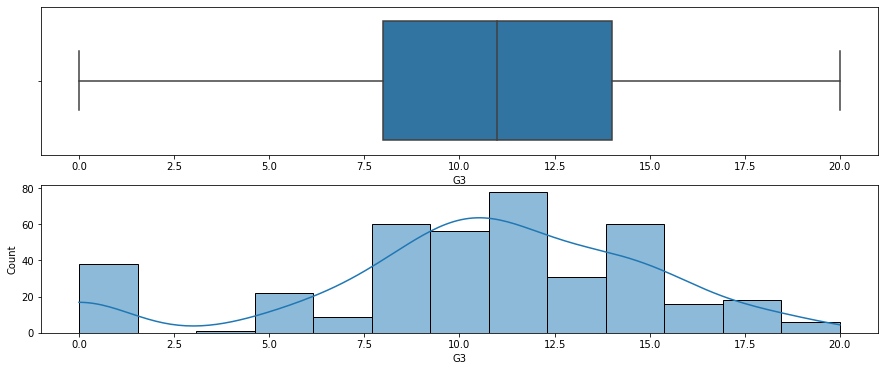

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
sns.boxplot(x=df_copy['G3'])
plt.subplot(2,1,2)
sns.histplot(df['G3'], kde='kde')

    

In [10]:

to_transform={}
for i in range(0,21,1):
     if 0 <= i <= 9:
        to_transform[i] = "n_suff"
     elif 9 < i < 15:
        to_transform[i] = "suff"
     else:
        to_transform[i] = "v_good"

df_copy['G3']=df_copy['G3'].replace(to_transform)



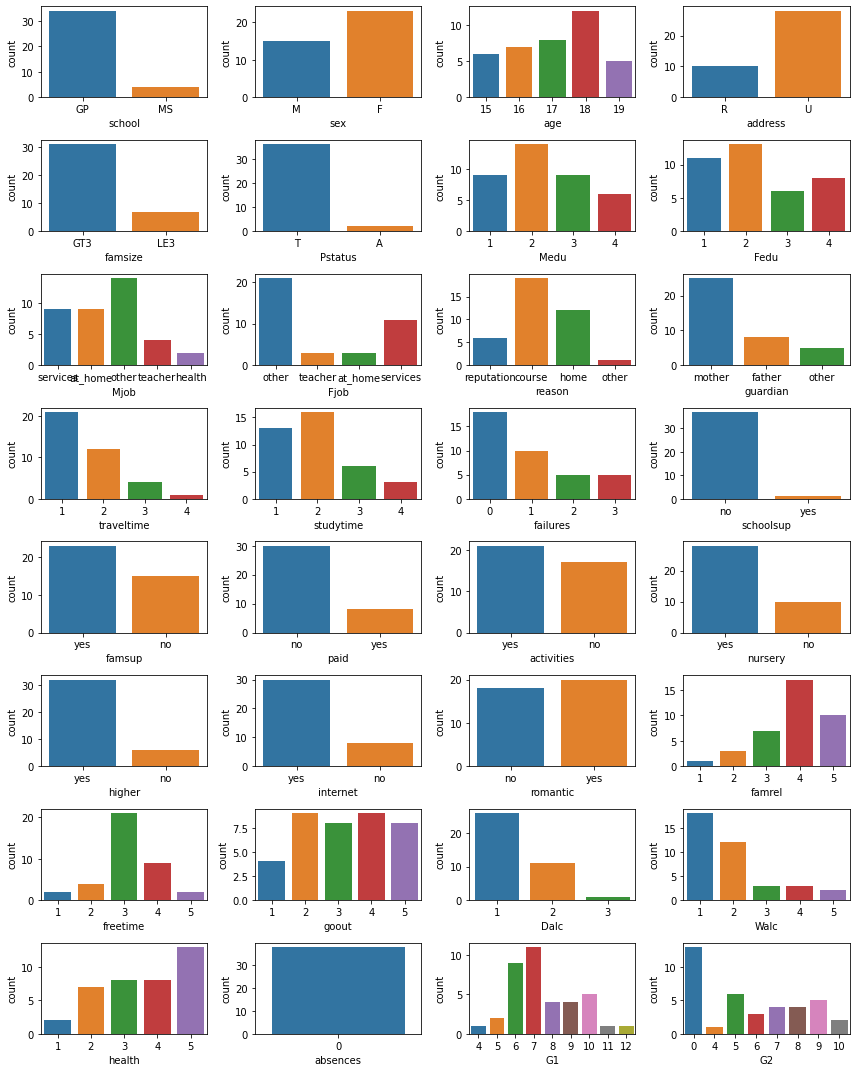

In [11]:
plt.figure(figsize=(12,15))
zeros=df[df['G3']==0]
i=1
for cols in zeros.columns:
    if cols != 'G3':
        plt.subplot(8,4,i)
        sns.countplot(data=zeros, x=cols)
        plt.tight_layout()
    i+=1

<AxesSubplot:xlabel='G3'>

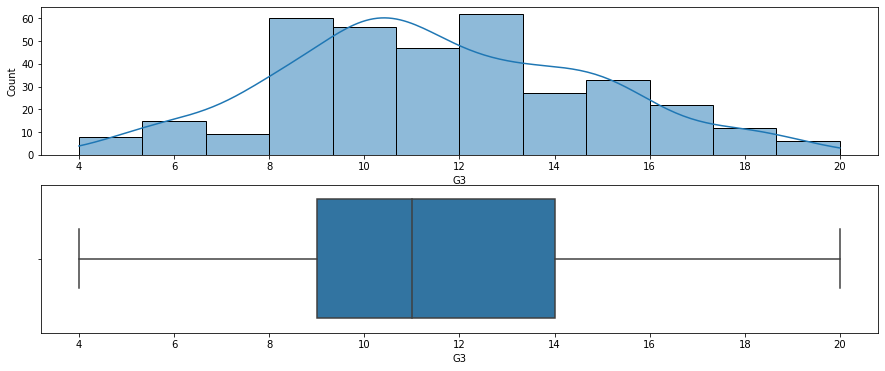

In [12]:
df=df[df['G3']>0]
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
sns.histplot(df['G3'], kde='kde')
plt.subplot(2,1,2)
sns.boxplot(data=df,x='G3')

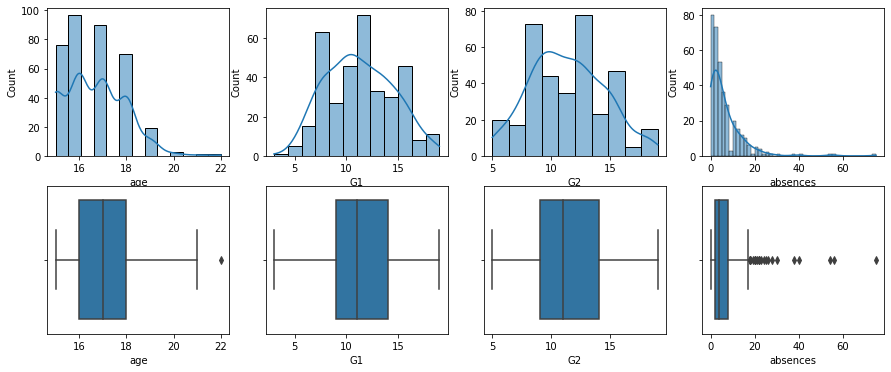

In [13]:
#Analysis the numerical feature
i=1
plt.figure(figsize=(15,6))
for f in num:
    if f !='G3' and f!='failures':
        plt.subplot(2,4,i)
        sns.histplot(data=df, x=f, kde=True)
        plt.subplot(2,4,i+4)
        sns.boxplot(data=df, x=f)
        i+=1



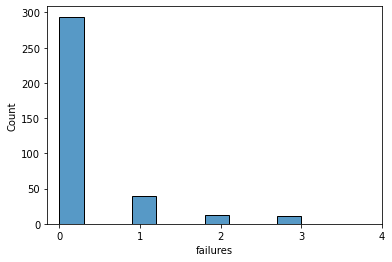

In [14]:
sns.histplot(df['failures']).set_xticks([0,1,2,3,4])

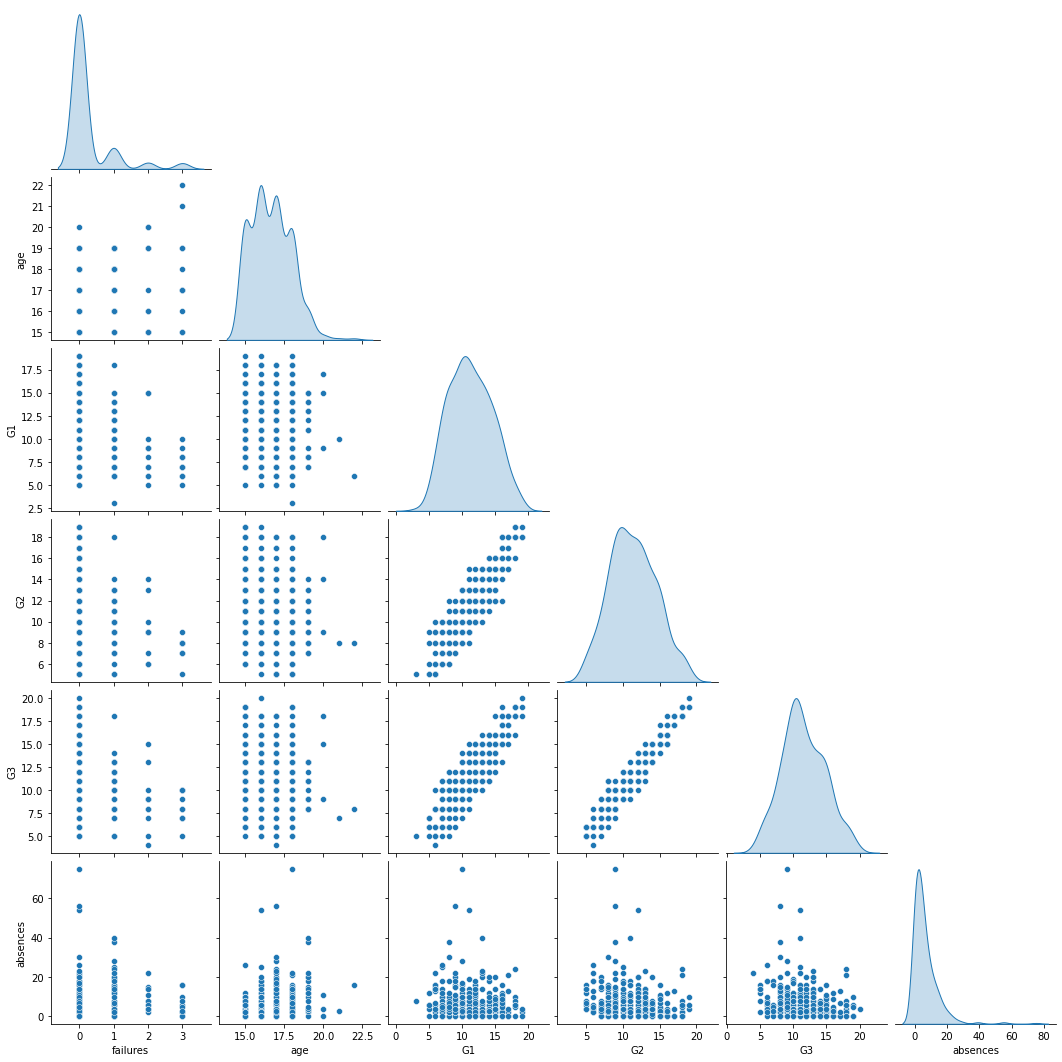

In [15]:
sns.pairplot(df[num], diag_kind='kde',corner='True')

<AxesSubplot:>

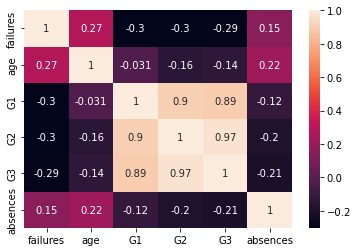

In [16]:
corr_matrix=df[num].corr()
sns.heatmap(corr_matrix, annot=True)

In [17]:
df=df.drop(['G1'],axis=1)
num=num.remove('G1')

In [18]:
def boxplot_custom(cat_list):
    i=1
    
    for feature in cat_list:
        plt.figure(figsize=(7,7))
        sns.boxplot(data=df, x=feature, y='G3')
        

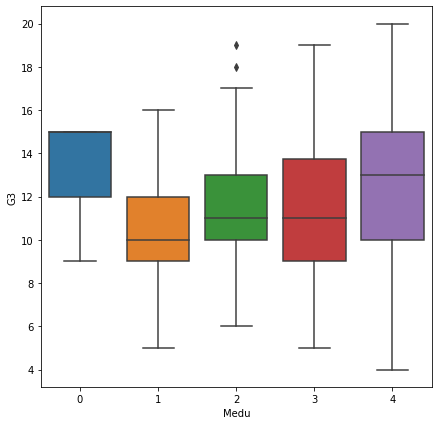

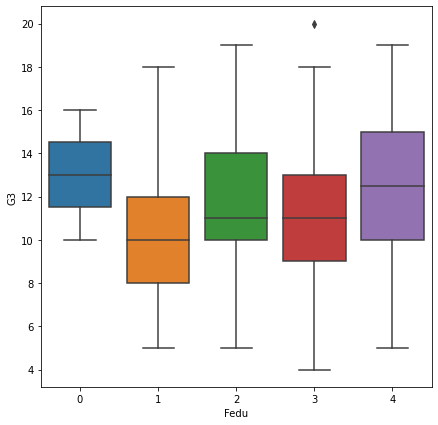

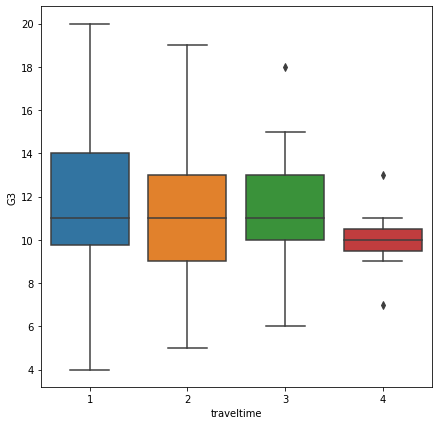

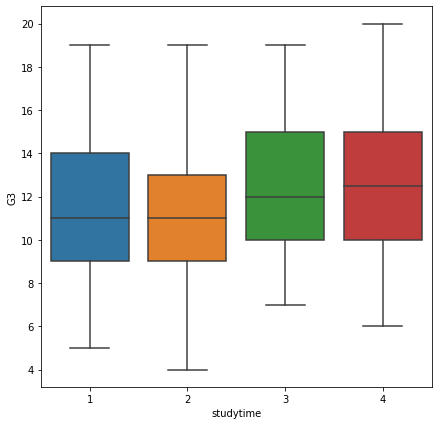

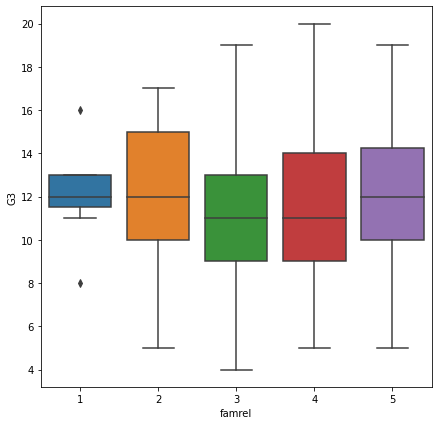

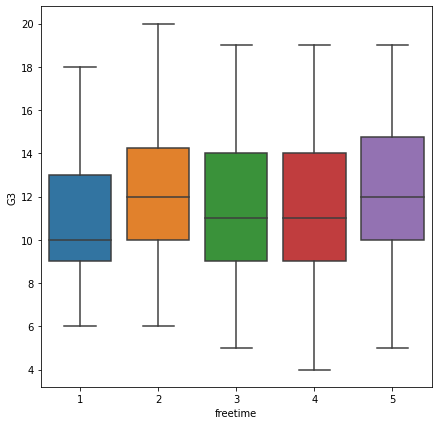

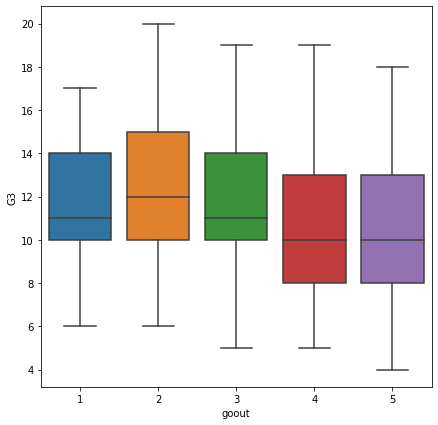

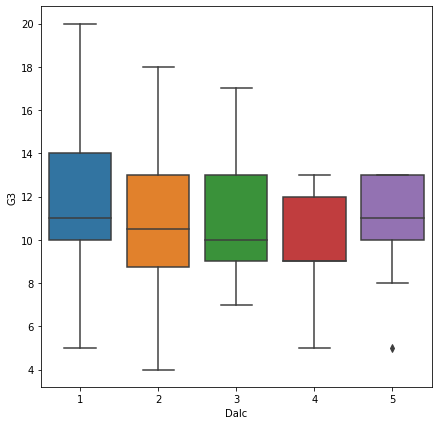

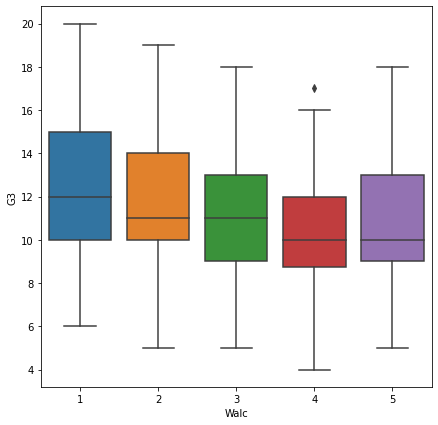

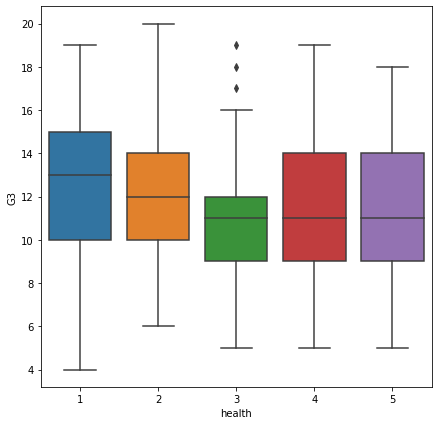

In [19]:
# ordinal category feature
boxplot_custom(cat_ord)

<BarContainer object of 10 artists>

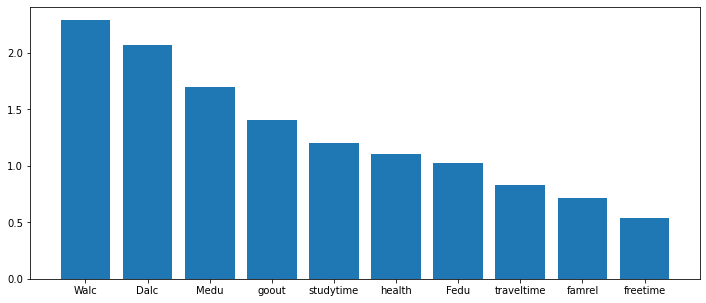

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split


X_train , X_test, y_train, y_test= train_test_split(df[cat_ord], df['G3'], test_size=.2 ,random_state=42, shuffle=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

sk=SelectKBest(k=10)
sk.fit(X_train,y_train)

sk.scores_

df_feature=pd.DataFrame(sk.scores_, index=df[cat_ord].columns, columns=['Scores']).sort_values(['Scores'], ascending=False)


plt.figure(figsize=(12,5))
plt.bar(x=df_feature.index, height=df_feature.Scores)

In [21]:
imp_feature=['Walc', 'Dalc', 'health', 'studytime', 'Medu', 'Fedu','G2', 'goout','failures', 'absences']

In [22]:
def combinedChart(data, feature, kind):
    chart_df=pd.crosstab(index=data[feature],columns=data['G3']).reset_index()
    chart_df=chart_df.set_index(feature)
    chart_df=chart_df.apply(lambda x: x/x.sum()*100, axis='columns').reset_index()
    chart_df=pd.melt(chart_df, id_vars=feature, var_name='G3')
    
    if kind=='bar':
        sns.barplot(data=chart_df, x=feature, y='value', hue='G3').set(ylabel='percentage of the total%')
    
    if kind=='line':
        sns.lineplot(data=chart_df, x=feature, y='value', hue='G3').set(ylabel='percentage of the total%')
        
    if kind=='scatter':
        sns.scatterplot(data=chart_df, x=feature, y='value' , hue='G3').set(ylabel='percentage of the total%')

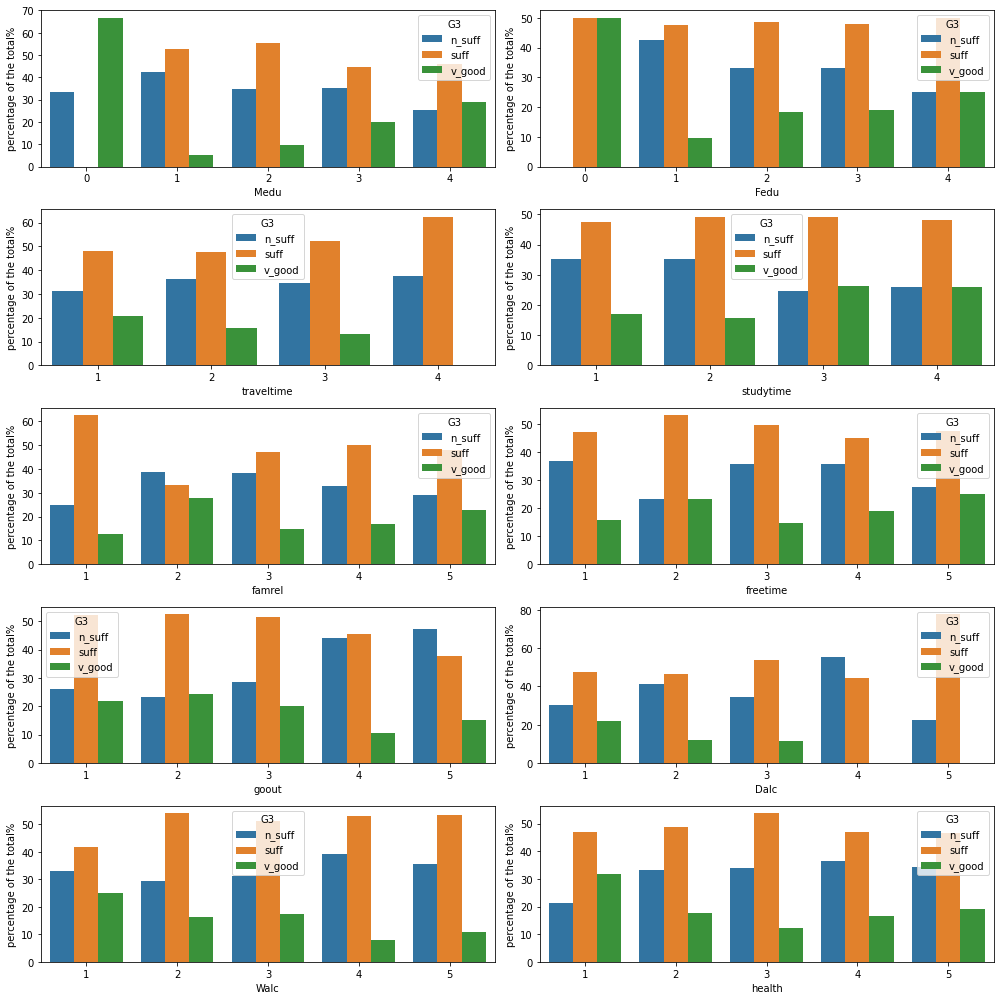

In [23]:
plt.figure(figsize=(14,14))
i=1
for f in cat_ord:
    plt.subplot(5,2,i)
    combinedChart(df_copy, f, kind='bar')
    plt.tight_layout()
    i+=1

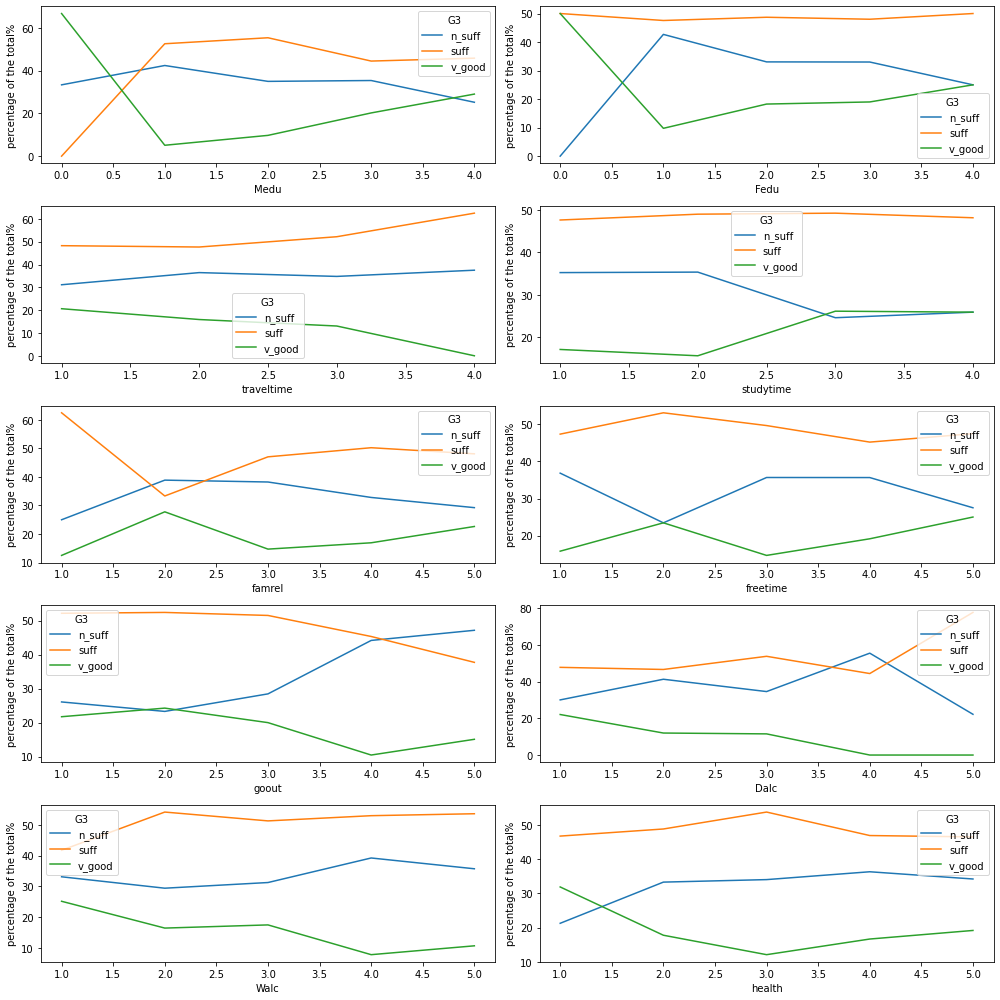

In [24]:
plt.figure(figsize=(14,14))
i=1
for f in cat_ord:
    plt.subplot(5,2,i)
    combinedChart(df_copy, f, kind='line')
    plt.tight_layout()
    i+=1

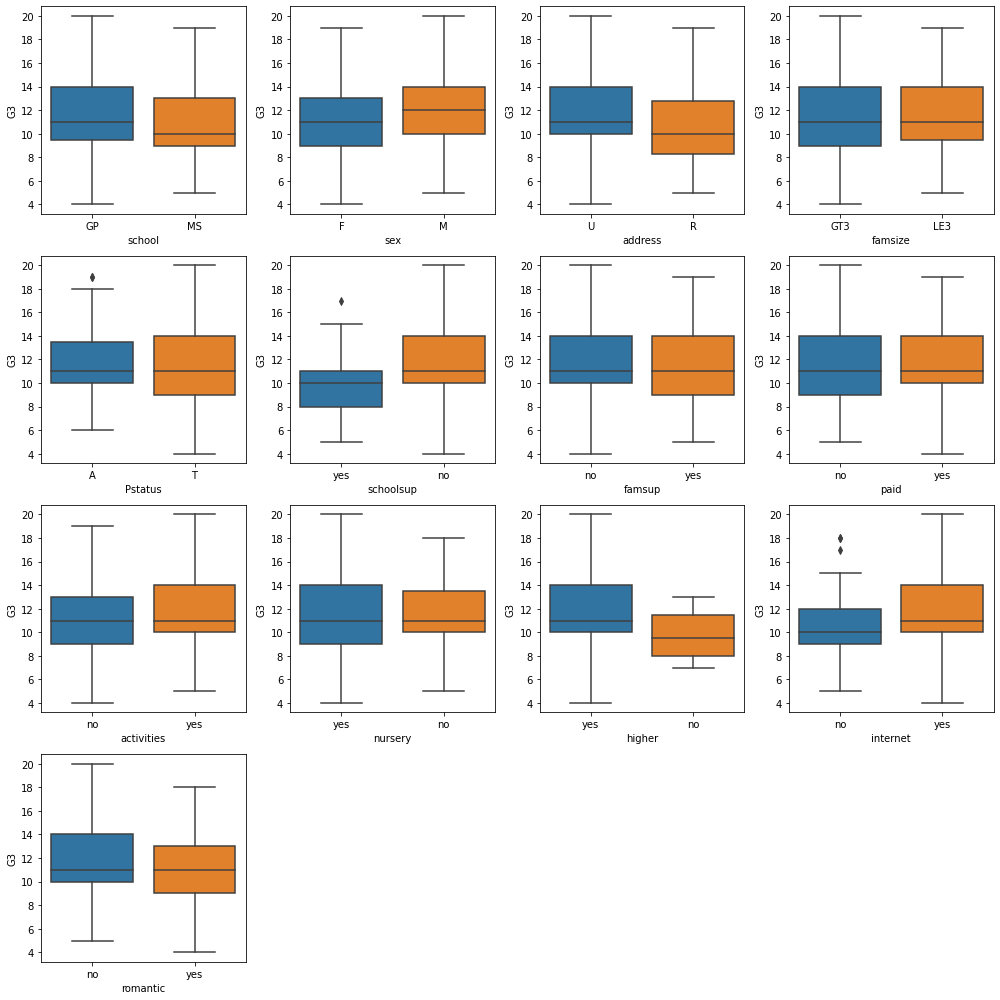

In [25]:
# binary category
i=1
plt.figure
plt.figure(figsize=(14,14))
for f in cat_binary:
    plt.subplot(4,4,i)
    sns.boxplot(data=df, x=f, y='G3')
    plt.tight_layout()
    i+=1

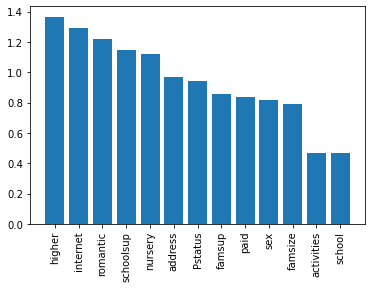

In [26]:
def find_feature(data, encoder=False):
    from sklearn.feature_selection import SelectKBest
    from sklearn.preprocessing import LabelEncoder

    X_train , X_test, y_train, y_test= train_test_split(df[data], df['G3'], shuffle=True, random_state=42)
    if encoder:
        le= LabelEncoder()
        for cols in X_train:
            X_train[cols]=le.fit_transform(X_train[cols])

    sk=SelectKBest()
    sk.fit(X_train, y_train)

    sk_df=pd.DataFrame(sk.scores_, index=data, columns=['scores'])
    sk_df=sk_df.sort_values(by='scores',ascending=False)


    plt.bar(data=sk_df, x=sk_df.index , height='scores')
    plt.xticks(rotation = 90)
        
find_feature(cat_binary , encoder=True)

In [27]:
imp_feature.extend(['higher','internet', 'romantic'])

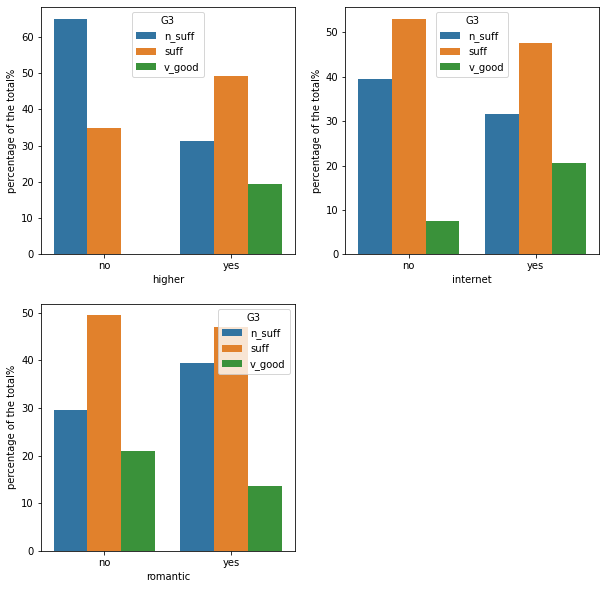

In [28]:
i=1
plt.figure(figsize=(10,10))
for feature in ['higher','internet', 'romantic']:
    plt.subplot(2,2,i)
    combinedChart(df_copy, feature, kind='bar')
    i+=1

In [29]:
# nominal catogory
df_dummies=pd.get_dummies(df[cat_qual])
df=pd.concat([df.drop(cat_qual,axis=1),df_dummies], axis=1)


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school             357 non-null    object
 1   sex                357 non-null    object
 2   age                357 non-null    int64 
 3   address            357 non-null    object
 4   famsize            357 non-null    object
 5   Pstatus            357 non-null    object
 6   Medu               357 non-null    int64 
 7   Fedu               357 non-null    int64 
 8   traveltime         357 non-null    int64 
 9   studytime          357 non-null    int64 
 10  failures           357 non-null    int64 
 11  schoolsup          357 non-null    object
 12  famsup             357 non-null    object
 13  paid               357 non-null    object
 14  activities         357 non-null    object
 15  nursery            357 non-null    object
 16  higher             357 non-null    object
 1

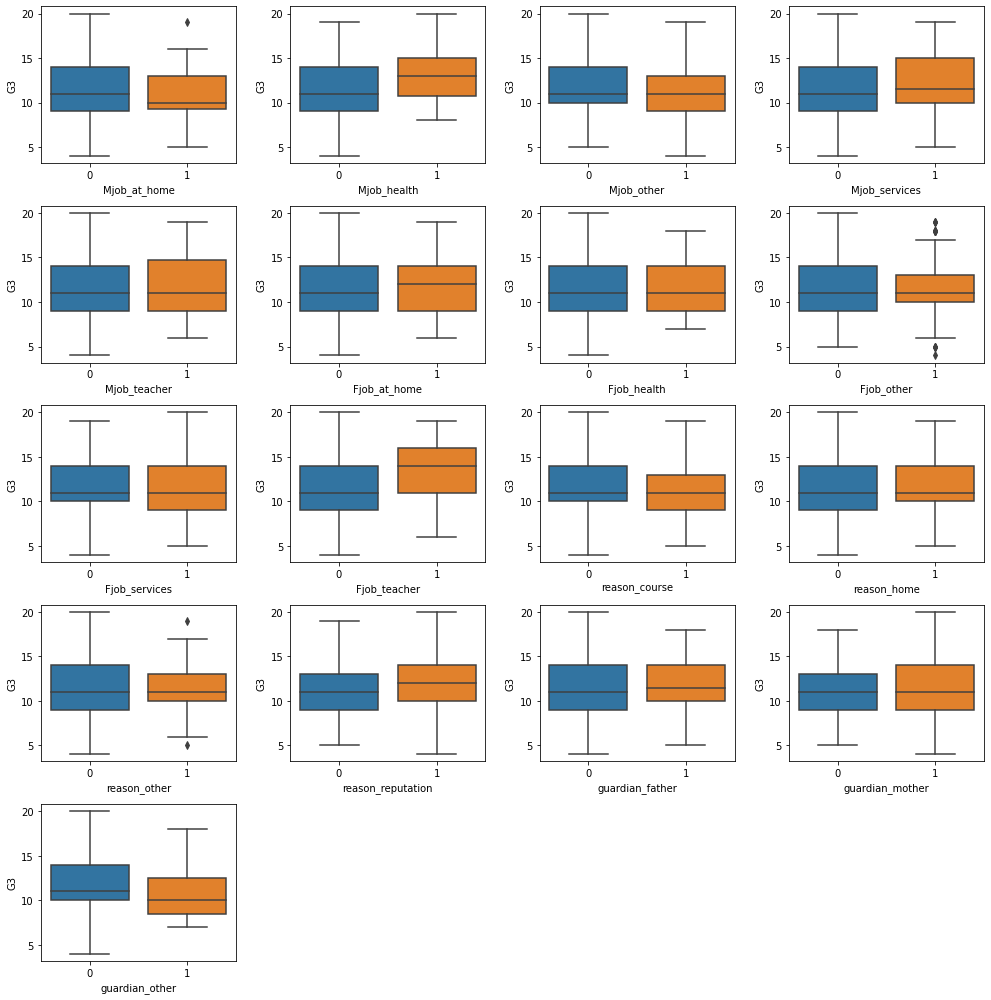

In [31]:
plt.figure(figsize=(14,14))
i=1
for feature in df_dummies.columns:
    plt.subplot(5,4,i)
    sns.boxplot(data=df, x=feature, y='G3')
    plt.tight_layout()
    i+=1

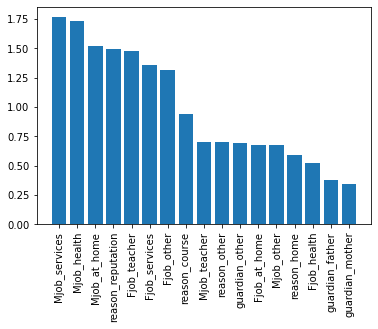

In [32]:
find_feature(list(df_dummies.columns), encoder=True)

In [33]:
imp_feature.extend(['Mjob_services','Mjob_health', 'Mjob_at_home','Fjob_teacher'])

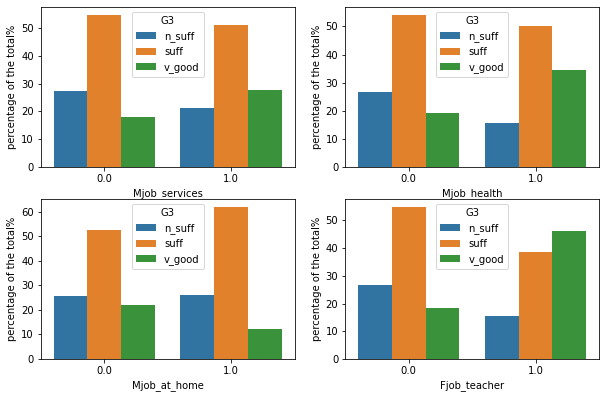

In [34]:
new_df_dummies=pd.concat([df_copy['G3'], df_dummies], axis=1)
i=1
plt.figure(figsize=(10,10))
for feature in ['Mjob_services','Mjob_health', 'Mjob_at_home','Fjob_teacher']:
    plt.subplot(3,2,i)
    combinedChart(new_df_dummies, feature, kind='bar')
    i+=1

In [35]:
# Machine Learning

In [36]:
pd.set_option('display.max_columns', None)

In [37]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,8,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,14,15,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,MS,M,17,U,LE3,T,3,1,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,16,16,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,MS,M,21,R,GT3,T,1,1,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,8,7,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,12,10,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [38]:
df_feature=df[imp_feature]

In [39]:
df_feature

,Walc,Dalc,health,studytime,Medu,Fedu,G2,goout,failures,absences,higher,internet,romantic,Mjob_services,Mjob_health,Mjob_at_home,Fjob_teacher
0,1,1,3,2,4,4,6,4,0,6,yes,no,no,0,0,1,1
1,1,1,3,2,1,1,5,3,0,4,yes,yes,no,0,0,1,0
2,3,2,3,2,1,1,8,2,3,10,yes,yes,no,0,0,1,0
3,1,1,5,3,4,2,14,2,0,2,yes,yes,yes,0,1,0,0
4,2,1,5,2,3,3,10,2,0,4,yes,no,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5,4,4,2,2,2,9,4,2,11,yes,no,no,1,0,0,0
391,4,3,2,1,3,1,16,5,0,3,yes,yes,no,1,0,0,0
392,3,3,3,1,1,1,8,3,3,3,yes,no,no,0,0,0,0
393,4,3,5,1,3,2,12,1,0,0,yes,yes,no,1,0,0,0


In [40]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2 
from sklearn.metrics import make_scorer

r2_score=make_scorer(r2)
mae_score=make_scorer(mae)
mse_score=make_scorer(mse)



In [41]:
df_target= df['G3']
X_train, X_test, y_train, y_test= train_test_split(df_feature, df_target, test_size=0.2, random_state=0)

In [42]:
def encoder(data):
        le=LabelEncoder()
        for cols in data.columns:
            if len(data[cols].unique())==2:
                
                data[cols]=le.fit_transform(data[cols])
        return data
        
X_train=encoder(X_train)
X_test=encoder(X_test)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_18036/2774670133.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols]=le.fit_transform(data[cols])


In [43]:
scaler=MinMaxScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
scores = {"r2":r2_score, "mae":mae_score, "mse": mse_score}
model = RandomForestRegressor()
seed = 0
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state= seed)

#preparing parameter values to be validated
rf_params = [{"max_features": np.arange(1, len(X_train.columns)+1, 1), # maximum number of features used
              "min_samples_split": np.arange(1, 11, 1)}]# minimum number of samples required to split a node
                
#start the search
rf = RandomizedSearchCV(model, rf_params, 
                        scoring=scores, #calculating the score for each of the previously chosen metrics
                        refit="r2", #chooses the values that obtain the best r2 score
                        n_iter=30, #number of combinations tried
                        cv=crossval, n_jobs=-1, #number of jobs performed in parallel (-1 means all)
                        random_state= seed, verbose=1)

#training the model with the hyperparameters found and at the same time I measure the training time
time_rf = %timeit -o rf.fit(X_train, y_train)
print(f"R2 score: {rf.best_score_}, hyperparameters: {rf.best_params_}")
print("training time:{}".format(time_rf))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.92352168 0.92425189 0.9223776  0.87947507 0.87218582 0.92249099
 0.51005376 0.91483179 0.92231344 0.91418395 0.92192972 0.53082387
 0.91440564 0.91643641 0.8709728  0.62139297 0.89930797 0.91904331
        nan 0.89895099 0.92268006 0.51363355 0.9179175  0.92342565
 0.9183679  0.79848653 0.89112812 0.92432677 0.84935544 0.73207106]
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.7103898  0.70038884 0.70965241 0.86603051 0.89954967 0.70997694
 1.7364932  0.7487969  0.71396491 0.74814077 0.71684211 1.72273796
 0.75369955 0.74210417 0.9015147  1.5198619  0.79922807 0.72782456
        nan 0.80974498 0.70681305 1.75275074 0.73027986 0.70378947
 0.73237967 1.10595528 0.82542272 0.69554437 0.9813622  1.27508503]
  warnings.warn(
C:\Users\A

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.9239699  0.92428881 0.92303187 0.87979903 0.87241499 0.92289473
 0.49390156 0.91655558 0.92268172 0.91615923 0.92239834 0.51352672
 0.91333777 0.91746994 0.87150736 0.62906247 0.89628722 0.91817006
        nan 0.89376788 0.92288213 0.52206022 0.91930648 0.92262368
 0.91978465 0.79158282 0.89250339 0.92313962 0.84860792 0.73167089]
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.70585295 0.69919169 0.70034549 0.87681924 0.90235306 0.7049888
 1.76915702 0.7394719  0.70694737 0.73908617 0.71210526 1.7

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.92481754 0.92459638 0.92319477 0.87140624 0.87123831 0.92367037
 0.4705561  0.91518351 0.92248993 0.91446662 0.92411014 0.54218965
 0.91201378 0.91622607 0.87581397 0.63169116 0.89380976 0.92193742
        nan 0.89400315 0.92469258 0.52437357 0.91880341 0.92334287
 0.91879552 0.78480472 0.88846187 0.92419208 0.84727921 0.74085444]
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.70021462 0.69787821 0.69637274 0.89374171 0.90725555 0.69900004
 1.8259781  0.73945238 0.71407018 0.74924252 0.70052632 1.69627735
 0.76698051 0.73662221 0.88826346 1.49918773 0.83003509 0.71880702
        nan 0.83665423 0.69920508 1.72734147 0.73791517 0.69929825
 0.72936448 1.14445561 0.85151663 0.69677278 0.98312862 1.26199344]
  warnings.warn(
C:\Users\A

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.92290724 0.92564203 0.92136713 0.87475226 0.87590477 0.9242255
 0.50361976 0.91517694 0.92405612 0.91686164 0.9232577  0.51307504
 0.91615224 0.9194081  0.87227077 0.63501731 0.89255221 0.9184263
        nan 0.89468525 0.92421434 0.51847604 0.91953835 0.92301431
 0.91989468 0.79694785 0.88714192 0.92449722 0.84974207 0.74084703]
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.71201158 0.69318816 0.70977463 0.8923443  0.8916768  0.6993557
 1.75007312 0.7438943  0.7105614  0.73298602 0.71221053 1.732

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.92453235 0.92464502 0.92310402 0.87999379 0.86956343 0.92524934
 0.50238472 0.91789405 0.92211499 0.91480565 0.92281665 0.49763164
 0.91418754 0.91727442 0.87081521 0.63045965 0.90058149 0.91990005
        nan 0.88680717 0.92468261 0.53051346 0.92148253 0.92240067
 0.91818786 0.79067331 0.88830625 0.92304702 0.85113132 0.74157987]
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.6959394  0.69194498 0.70531931 0.8791799  0.91140171 0.70078185
 1.75583035 0.73049444 0.71421053 0.74258628 0.70666667 1.76504711
 0.75014051 0.74203798 0.91005977 1.50500732 0.81133333 0.72003509
        nan 0.84997403 0.69684654 1.71839649 0.7160478  0.71126316
 0.73566608 1.12810968 0.84627748 0.69925559 0.96509545 1.25522168]
  warnings.warn(
C:\Users\A

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.9223791  0.92366812 0.92363294 0.88355269 0.87551995 0.92367331
 0.51901787 0.91500195 0.92353252 0.91608302 0.92424686 0.52776297
 0.91038125 0.91713484 0.87696359 0.63426778 0.898994   0.91885609
        nan 0.89430527 0.92446408 0.51335161 0.91878534 0.92185682
 0.92020341 0.78961165 0.89153024 0.92434348 0.85545204 0.74209707]
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.71195663 0.70193188 0.70082086 0.8573686  0.88081684 0.70151516
 1.73640717 0.7428659  0.71035088 0.74007551 0.702      1.

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.92325784 0.92468749 0.92396875 0.87685394 0.86875094 0.92327354
 0.53032746 0.91674929 0.92224721 0.91534115 0.92181491 0.50705072
 0.91167291 0.91667678 0.87743656 0.64770945 0.89380986 0.92026384
        nan 0.89601611 0.92476735 0.53785274 0.92195529 0.92120966
 0.91959675 0.79615275 0.88668371 0.92225711 0.85343893 0.74284542]
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.70985349 0.69578264 0.69801141 0.88034962 0.91860553 0.71139194
 1.71247467 0.74578513 0.71231579 0.73787985 0.70884211 1.77082967
 0.76002719 0.73801679 0.87548907 1.4647976  0.82761404 0.72687719
        nan 0.8294691  0.69553236 1.69382716 0.71763842 0.71835088
 0.72115131 1.11545333 0.84638724 0.70522584 0.94941461 1.24014827]
  warnings.warn(
C:\Users\A

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


8.43 s ± 1.12 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
R2 score: 0.92402754608559, hyperparameters: {'min_samples_split': 4, 'max_features': 14}
training time:8.43 s ± 1.12 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.92402755 0.92272088 0.92326408 0.87795206 0.87137997 0.92367099
 0.47614825 0.91394749 0.922798   0.91348255 0.92174412 0.50846924
 0.91411384 0.91690932 0.87332388 0.63445951 0.8964864  0.9194571
        nan 0.89481716 0.92316783 0.52931912 0.92009867 0.92066066
 0.9175003  0.795304   0.89002791 0.92356276 0.84574276 0.74074947]
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.70600552 0.70871963 0.70266045 0.87470916 0.88462018 0.70732493
 1.81538873 0.74478401 0.71270175 0.75241436 0.71217544 1.75824993
 0.74938313 0.72983233 0.89035344 1.49373494 0.81073684 0.73235088
        nan 0.82224494 0.70646227 1.70320514 0.72159693 0.71940351
 0.73339959 1.12024648 0.83323053 0.70155563 0.98235062 1.2555709 ]
  warnings.warn(
C:\Users\AS

In [45]:
rf_dataframe=pd.DataFrame(rf.cv_results_)
rf_dataframe=rf_dataframe[["param_min_samples_split", "param_max_features", 'mean_test_mae', 'mean_test_mse', 'mean_test_r2']]
rf_dataframe = rf_dataframe.sort_values(by="mean_test_r2", ascending=False)
rf_dataframe.head(5)

,param_min_samples_split,param_max_features,mean_test_mae,mean_test_mse,mean_test_r2
0,4,14,0.706006,0.803925,0.924028
5,5,15,0.707325,0.806842,0.923671
27,8,16,0.701556,0.808561,0.923563
2,9,17,0.702660,0.811624,0.923264
20,4,16,0.706462,0.812043,0.923168


In [64]:
rf_test_accuracy=rf.score(X_test, y_test)

In [47]:
from sklearn.svm import SVR

model_svr=SVR()
svr_params = [{"kernel": ["linear"], 'gamma': ['scale']},
              {"kernel": ["poly"], 'gamma': ['scale'], 'degree': np.arange(1,5,1)} ] 
               
      

svr=RandomizedSearchCV(model_svr, svr_params, cv=crossval,  n_jobs=-1, random_state=seed, refit='r2', scoring=scores, n_iter=100, verbose=1)
    
svr.fit(X_train, y_train)
print(f'model_best_scores: {svr.best_score_} , model_best_param: {svr.best_params_}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
model_best_scores: 0.9256186714416484 , model_best_param: {'kernel': 'linear', 'gamma': 'scale'}


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=100. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [67]:
svr_test_accuracy=svr.score(X_test, y_test)

In [49]:
svr_dataframe=pd.DataFrame(svr.cv_results_)
svr_dataframe=svr_dataframe[["param_kernel", "param_degree", 'mean_test_mae', 'mean_test_mse', 'mean_test_r2']]
svr_dataframe = svr_dataframe.sort_values(by="mean_test_r2", ascending=False)
svr_dataframe.head(5)

,param_kernel,param_degree,mean_test_mae,mean_test_mse,mean_test_r2
0,linear,NaN,0.712594,0.785023,0.925619
2,poly,2,0.782330,0.970903,0.908322
3,poly,3,0.884890,1.263481,0.880884
1,poly,1,0.972767,1.446476,0.863324
4,poly,4,1.043460,1.779707,0.832270


In [50]:
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor()

knn_params=[{'n_neighbors': np.arange(1,20,1)}]

knn=RandomizedSearchCV(model_knn, knn_params, cv=crossval,  n_jobs=-1, random_state=seed, refit='r2', scoring=scores, n_iter=30, verbose=1)

knn.fit(X_train, y_train)
print(f'model_best_scores: {knn.best_score_} , model_best_param: {knn.best_params_}')

Fitting 5 folds for each of 19 candidates, totalling 95 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 19 is smaller than n_iter=30. Running 19 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


model_best_scores: 0.3550603392508262 , model_best_param: {'n_neighbors': 10}


In [51]:
from sklearn.linear_model import Ridge
model_ridge=Ridge()

ridge_params=[{'alpha': np.arange(1,20,0.01)}]

ridge=RandomizedSearchCV(model_ridge, ridge_params, cv=crossval,  n_jobs=-1, random_state=seed, refit='r2', scoring=scores, n_iter=100, verbose=1)

ridge.fit(X_train, y_train)
print(f'model_best_scores: {ridge.best_score_} , model_best_param: {ridge.best_params_}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


model_best_scores: 0.9245619316740079 , model_best_param: {'alpha': 1.06}


In [65]:
ridge_test_accuracy=ridge.score(X_test, y_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklear

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklear

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ASUS\anaconda3\lib\site-packages\sklear

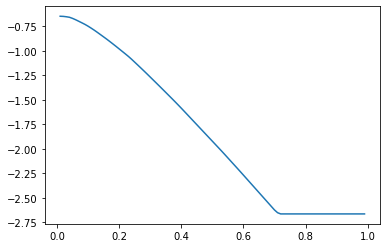

,alpha,error
0,0.01,-0.646692


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso

alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/100)
    la=Lasso(alpha=i/100)
    error.append(np.mean(cross_val_score(la, X_train,y_train,scoring='neg_mean_absolute_error', cv=crossval)))
plt.plot(alpha,error)
plt.show()

err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error==max(df_err.error)]


In [54]:
model_la=Lasso()
lasso_params=[{'alpha': [0.01]}]

la=RandomizedSearchCV(model_la, lasso_params, cv=crossval, n_iter=100, n_jobs=-1, scoring=scores, refit='r2', verbose=1, random_state=seed)
la.fit(X_train, y_train)
print(f'R2 Best Scores: {la.best_score_}, Best params: {la.best_params_} ')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2 Best Scores: 0.934058581906086, Best params: {'alpha': 0.01} 


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [66]:
la_test_accuracy=la.score(X_test, y_test)

In [56]:
t_pred_la=la.predict(X_test)
t_pred_ridge=ridge.predict(X_test)
t_pred_rf_r=rf.predict(X_test)
t_pred_svr=svr.predict(X_test)

In [69]:
model={"Lasso ": la_test_accuracy, "Ridge Regression" : ridge_test_accuracy, "RandomForestRegressor":rf_test_accuracy,"Support vector machine regression ": svr_test_accuracy}

model_dataframe= pd.DataFrame(model, index=['Accuracy'])

model_dataframe



,Lasso,Ridge Regression,RandomForestRegressor,Support vector machine regression
Accuracy,0.911276,0.899141,0.91134,0.90518


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


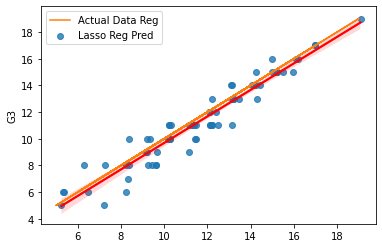

In [58]:
sns.regplot(t_pred_la, y_test, label='Lasso Reg Pred', line_kws = {"color": "red"}, ci=95)
plt.plot( y_test, y_test, label='Actual Data Reg')
plt.legend()


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


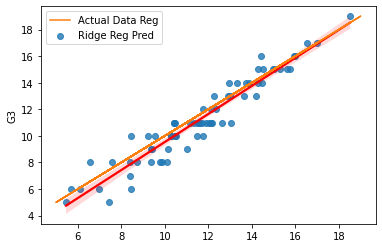

In [59]:
sns.regplot(t_pred_ridge, y_test, label='Ridge Reg Pred', line_kws = {"color": "red"})
plt.plot( y_test, y_test, label='Actual Data Reg')
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


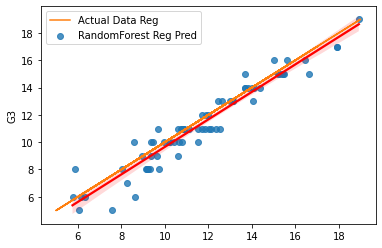

In [60]:
sns.regplot(t_pred_rf_r, y_test, label='RandomForest Reg Pred', line_kws = {"color": "red"}, ci=95)
plt.plot( y_test, y_test, label='Actual Data Reg')
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


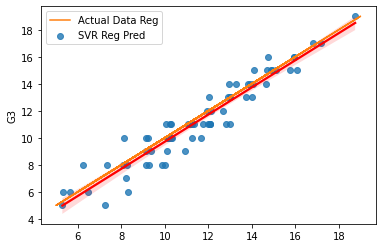

In [61]:
sns.regplot(t_pred_svr, y_test, label='SVR Reg Pred', line_kws = {"color": "red"}, ci=95)
plt.plot( y_test, y_test, label='Actual Data Reg')
plt.legend()

In [62]:
 y_test

6      11
152    10
330     8
240    12
90      8
       ..
182    17
174     9
214    10
63      9
327    10
Name: G3, Length: 72, dtype: int64

In [63]:
imp_feature

['Walc',
 'Dalc',
 'health',
 'studytime',
 'Medu',
 'Fedu',
 'G2',
 'goout',
 'failures',
 'absences',
 'higher',
 'internet',
 'romantic',
 'Mjob_services',
 'Mjob_health',
 'Mjob_at_home',
 'Fjob_teacher']